In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from utils.PGS_analysis import *
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from os.path import join
import seaborn as sns 

In [2]:
res = pd.read_table("results/R2_AUC_results.csv", sep='\s+')

In [3]:
order= {'Age_binned':['baseline', '(18, 45]', '(45, 65]', '(65, 100]'],
       'BMI_binned':['baseline', '(0.0, 18.5]','(18.5, 24.9]','(24.9, 30.0]', '(30.0, 50.0]'],
       'ancestry':['baseline','AFR', 'AMR', 'EAS', 'EUR', 'SAS'],
       'self_identified_sex':['baseline','Female', 'Male',]}
PGS = ['BC_eMERGE', 'BC_PGS000507', 'CHD_eMERGE', 'CHD_PGS003725']

## breast cancer

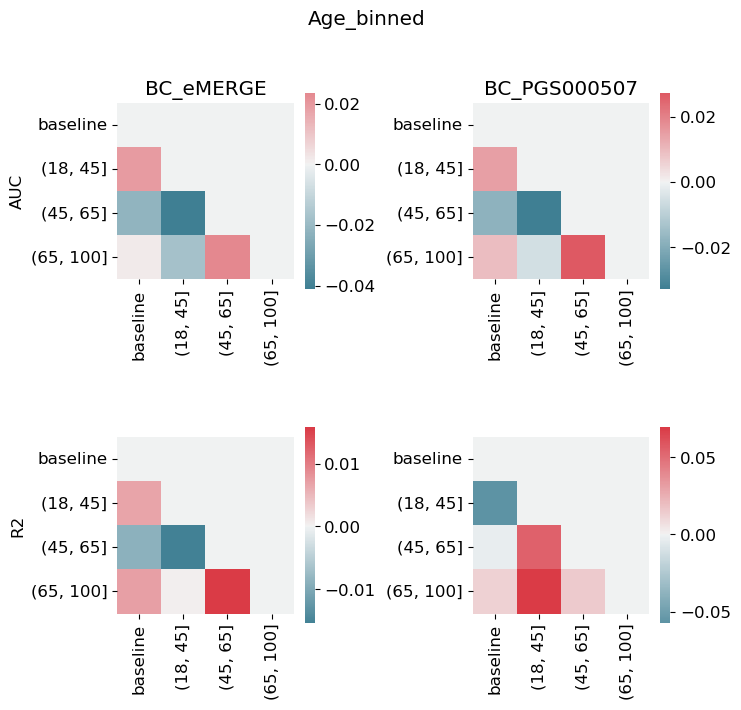

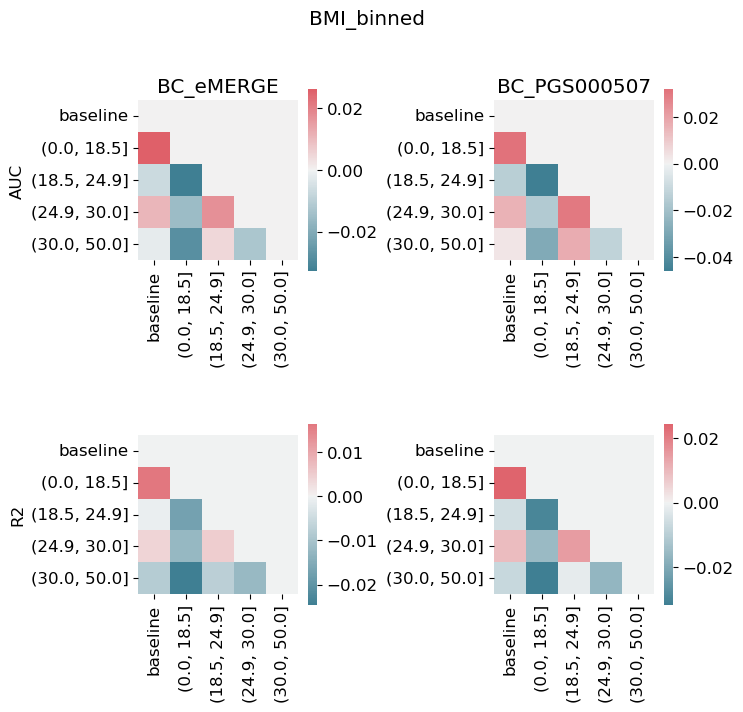

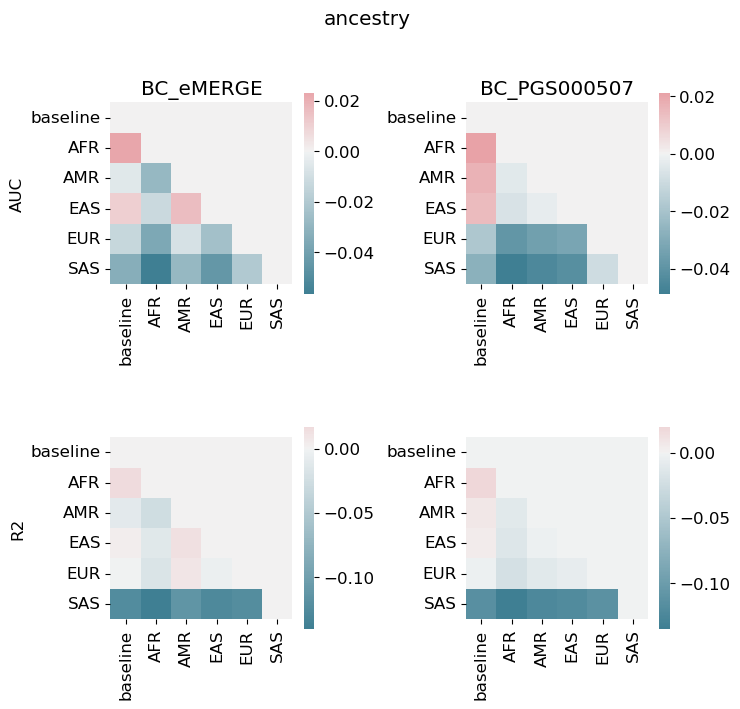

In [5]:
import matplotlib.pyplot as plt

rcParams.update({'font.size':12})
prs='PRS_PC'   
contexts = ['Age_binned',
            'BMI_binned' ,
            'ancestry']
for cont in contexts:
    fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))
    for i, pgs in enumerate(PGS):
        if not pgs.startswith('BC'):
            continue
        baseline = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context=='all')]
        aux = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context==cont)]
        aux = pd.concat([baseline, aux])
        aux.loc[aux.context_group=='1', 'context_group'] = 'baseline'
        aux.set_index(aux.context_group, drop=False,inplace=True)
        aux = aux.loc[order[cont]]
            
        r2_diff = []
        AUC_diff  = []
        for r1 in range(aux.shape[0]):
            aux_r2 = []
            aux_AUC = []
            for r2 in range(aux.shape[0]):
                aux_r2.append((aux.r2.iloc[r1]-aux.r2.iloc[r2]))#/baseline.r2.iloc[0])
                aux_AUC.append((aux.aux.iloc[r1]-aux.aux.iloc[r2]))#/baseline.aux.iloc[0])
            r2_diff.append(aux_r2)
            AUC_diff.append(aux_AUC)
        A = np.tril(np.array(AUC_diff).T)
        sns.heatmap(A, ax=ax[0, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, square=True,
                    cbar_kws={'shrink': 0.7})

        ax[0, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[0, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
        ax[0, i].set_title(pgs)

        A = np.tril(np.array(r2_diff).T)
        sns.heatmap(A, ax=ax[1, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                    center=0, square=True,
                    cbar_kws={'shrink': 0.7}) 

        ax[1, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[1, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
    ax[0,0].set_ylabel('AUC')
    ax[1, 0].set_ylabel('R2')
    plt.suptitle(cont)
    plt.tight_layout()
    plt.show()
                    

## Coronary heart disease

(2, 2)
(2, 2)


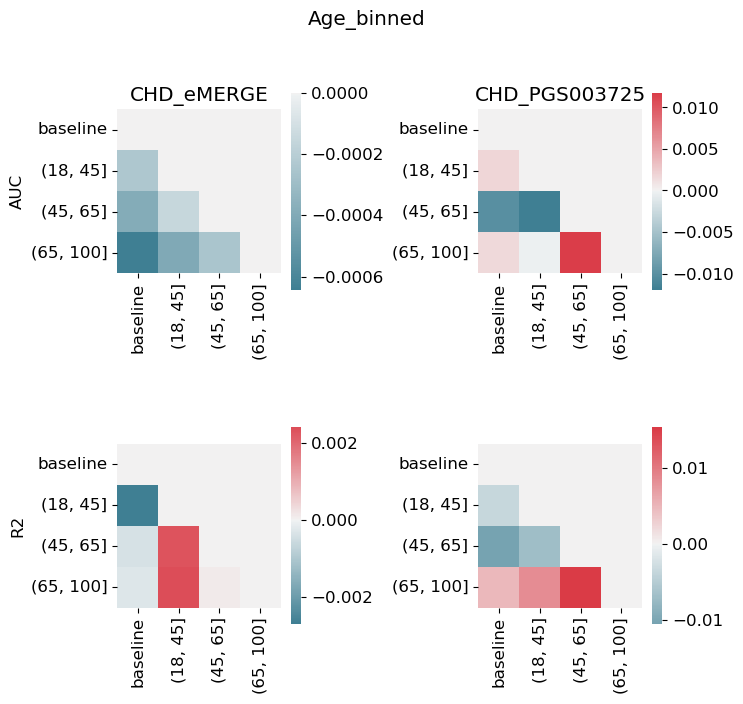

(2, 2)
(2, 2)


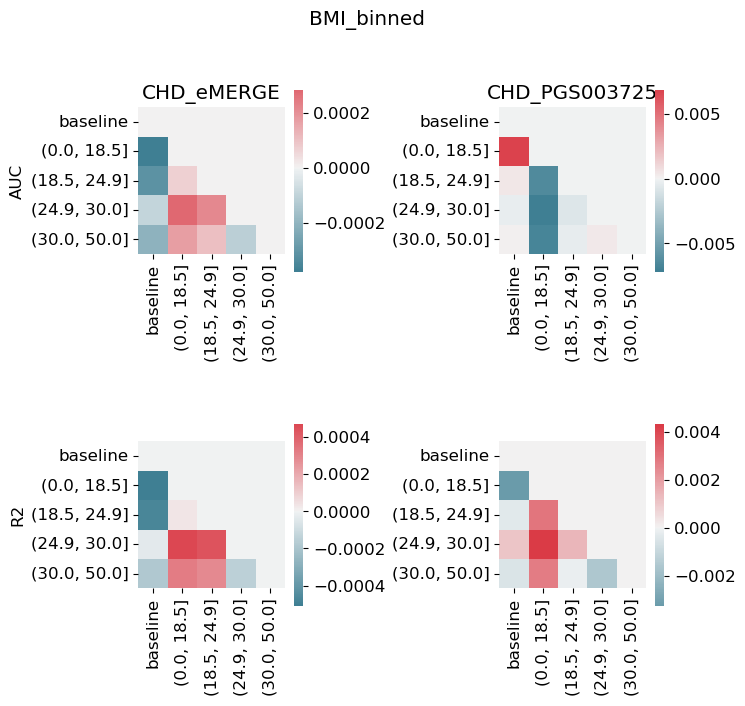

(2, 2)
(2, 2)


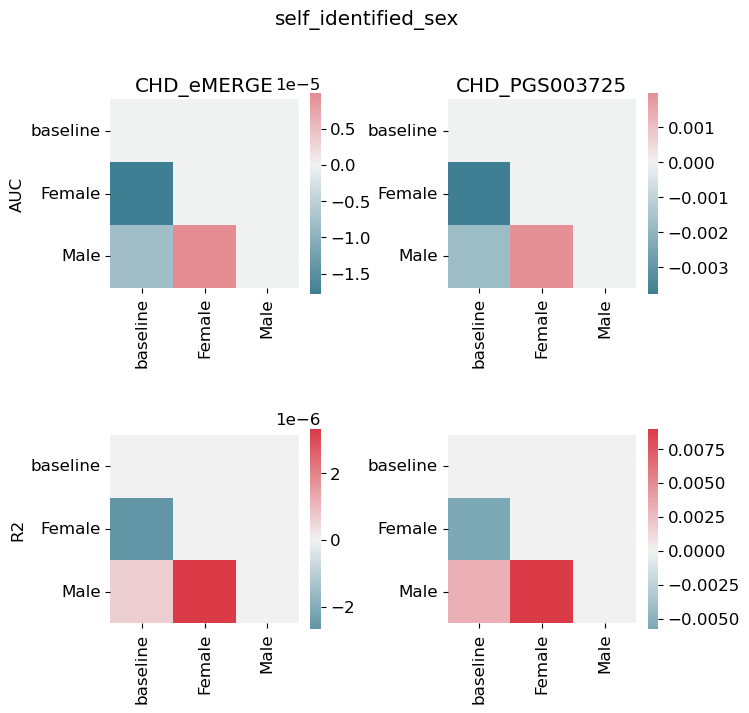

(2, 2)
(2, 2)


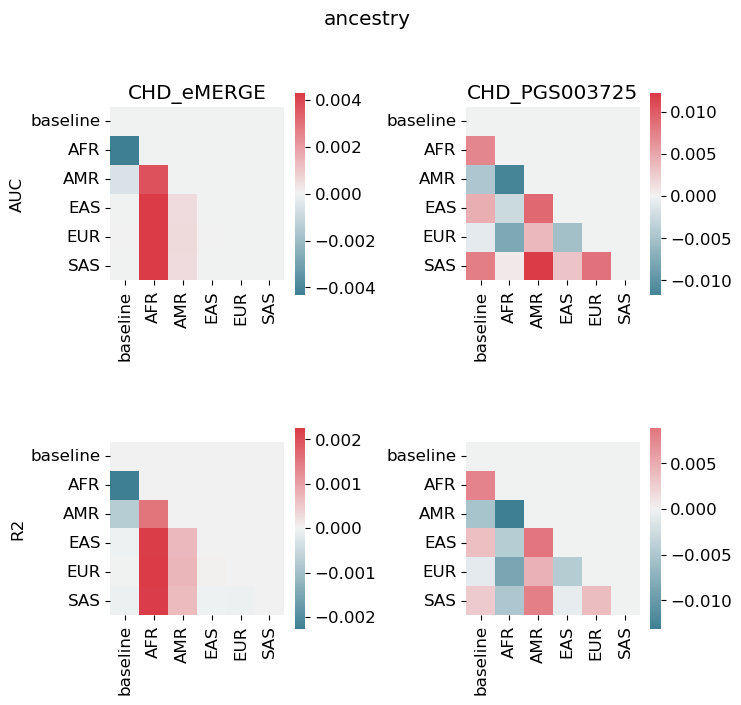

In [6]:
prs='PRS_PC'   
   
contexts = ['Age_binned',
            'BMI_binned' ,
            'self_identified_sex',
            'ancestry']
for cont in contexts:

    fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))
    for i, pgs in enumerate(PGS[2:]):

        baseline = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context=='all')]
        aux = res[(res.PGS==pgs)&(res.prs_type==prs)&(res.context==cont)]
        aux = pd.concat([baseline, aux])
        aux.loc[aux.context_group=='1', 'context_group'] = 'baseline'
        aux.set_index(aux.context_group, drop=False,inplace=True)
        aux = aux.loc[order[cont]]
            
        r2_diff = []
        AUC_diff  = []
        for r1 in range(aux.shape[0]):
            aux_r2 = []
            aux_AUC = []
            for r2 in range(aux.shape[0]):
                aux_r2.append((aux.r2.iloc[r1]-aux.r2.iloc[r2]))#/baseline.r2.iloc[0])
                aux_AUC.append((aux.aux.iloc[r1]-aux.aux.iloc[r2]))#/baseline.aux.iloc[0])
            r2_diff.append(aux_r2)
            AUC_diff.append(aux_AUC)
        A = np.tril(np.array(AUC_diff).T)
        sns.heatmap(A, ax=ax[0, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), center=0, square=True,
                    cbar_kws={'shrink': 0.7})

        ax[0, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[0, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[0, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
        ax[0, i].set_title(pgs)

        A = np.tril(np.array(r2_diff).T)
        sns.heatmap(A, ax=ax[1, i], 
                    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
                    center=0, square=True,
                    cbar_kws={'shrink': 0.7}) 

        ax[1, i].set_xticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_xticklabels(aux.context_group.to_list(), rotation=90)
        ax[1, i].set_yticks(np.arange(0.5, aux.shape[0]))
        ax[1, i].set_yticklabels(aux.context_group.to_list(), rotation=0)
    ax[0,0].set_ylabel('AUC')
    ax[1, 0].set_ylabel('R2')
    plt.suptitle(cont)
    plt.tight_layout()
    plt.show()
                    